ML parameter estimate: 0.873
ML parameter estimate: 0.879
ML parameter estimate: 0.867


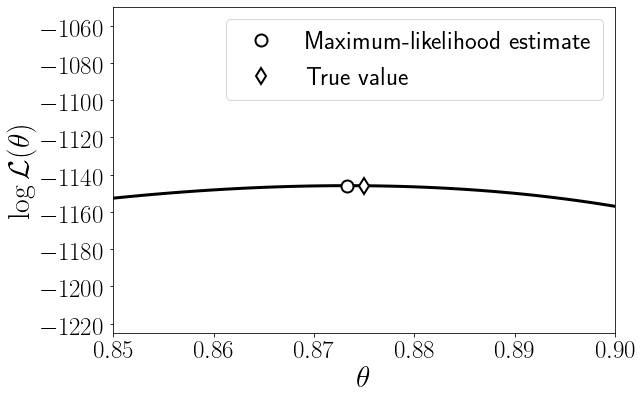

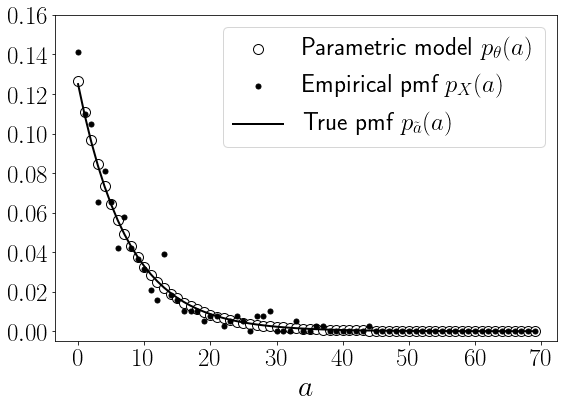

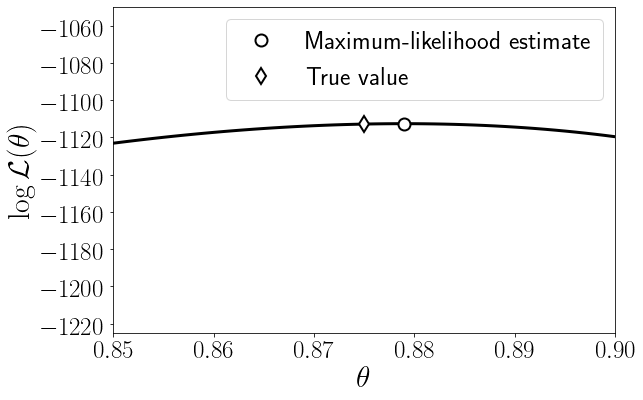

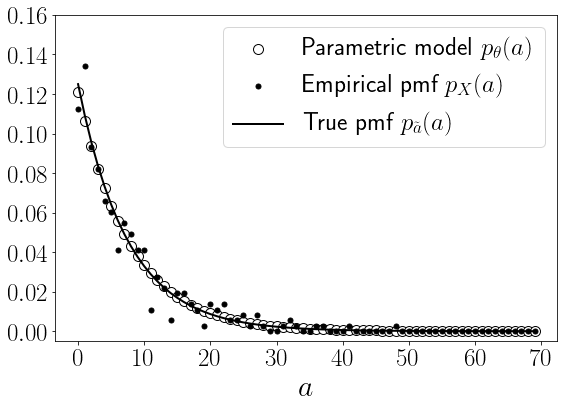

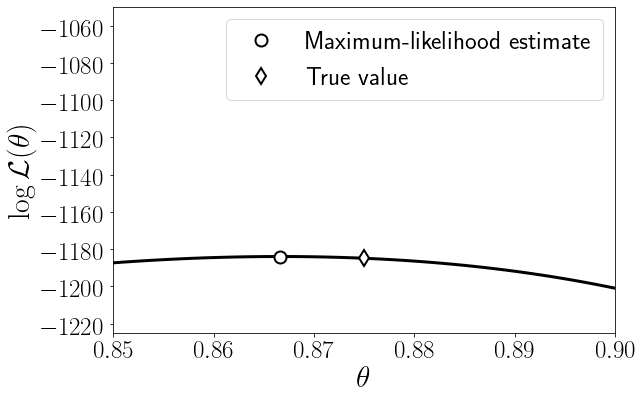

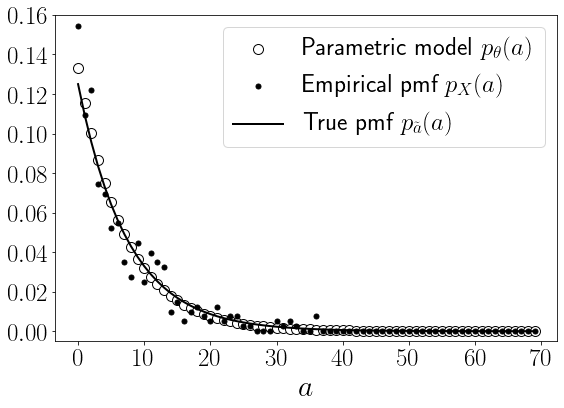

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

np.random.seed(1234)

true_param = 0.875
theta_min= 0.85
theta_max = 0.90
step = 1e-3
theta_vals = np.arange(theta_min,theta_max + step,step)

font_size = 30
font_size_legend = 25
font_size_ticks = 25

n_max = 70 # Upper bound on streak length
def compute_empirical_pmf(shots):
    consecutive = np.zeros(n_max)
    counter = 0
    for made in shots:
        if made == 0:
            consecutive[counter] += 1
            counter = 0
        else:
            counter +=1
    consecutive_empirical_pmf = consecutive.astype(float) / float(np.sum(consecutive))
    return consecutive_empirical_pmf

def parametric_model(param):
    parametric_fit = (1-param) * param**(np.arange(n_max))
    return parametric_fit

def log_likelihood(param,n_made,n_missed):
    return n_made * np.log(param) + n_missed * np.log(1-param)

true_pmf = parametric_model(true_param)

tries = 3
n = 3015

for ind in range(tries):
    free_throws = 1 * (np.random.rand(n) < true_param)
    n_made = np.sum(free_throws)
    n_missed = n - n_made
    log_likelihood_vals = log_likelihood(theta_vals,n_made,n_missed)
    max_likelihood_param = n_made / n
    print("ML parameter estimate: {:0.3f}".format(max_likelihood_param))

    y_min = -1225
    y_max = -1050
    plt.figure(figsize=(9,6))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(theta_vals,log_likelihood_vals,linewidth=3,color="black")
    plt.plot(max_likelihood_param, log_likelihood(max_likelihood_param,n_made,n_missed),'o',mew=2,markersize=12,markerfacecolor='white',markeredgecolor="black",
         label='Maximum-likelihood estimate')
    plt.plot(true_param,log_likelihood(true_param,n_made,n_missed),'d',mew=2,markersize=12,markerfacecolor='white',markeredgecolor="black",
         label='True value')   
    plt.xlim([theta_min,theta_max])
    plt.ylim([y_min,y_max])
    plt.xlabel(r'$\theta$',fontsize=font_size)
    plt.ylabel(r'$\log \mathcal{L}(\theta)$',fontsize=font_size)
    plt.legend(fontsize=font_size_legend)
    plt.savefig('plots/simulated_free_throws_loglikelihood_' + str(ind) +'.pdf',bbox_inches="tight")

    parametric_fit_max_likelihood = parametric_model(max_likelihood_param)
    empirical_pmf = compute_empirical_pmf(free_throws)
    y_max = 0.16
    plt.figure(figsize=(9,6))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.plot(range(n_max),parametric_fit_max_likelihood,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
         label=r'Parametric model $p_{\theta}(a)$')
    plt.plot(range(n_max),empirical_pmf,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
         label=r'Empirical pmf $p_{X}(a)$')
    plt.plot(range(n_max),true_pmf,color="black", lw=2,
         label=r'True pmf $p_{\tilde{a}}(a)$')
    plt.ylim([-0.005,y_max])
    plt.xlabel(r'$a$',fontsize=font_size)
    plt.legend(fontsize=font_size_legend)
    plt.savefig('plots/simulated_free_throws_parametric_' + str(ind) +'.pdf',bbox_inches="tight")